In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df_train = pd.read_csv('data/train.csv').drop(['id'], axis = 1)
df_test = pd.read_csv('data/test.csv').drop(['id'], axis = 1)

In [8]:
df_train.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,1,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,4,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,2,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,1,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,0,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


In [20]:
df_train.shape

(900000, 32)

In [9]:
df_test.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30
0,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,0,...,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,BAAABADLAC,99.478419,0,0
1,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,4,...,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,AFABBAEGCB,-65.993825,1,0
2,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,4,...,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,BBACABBKEE,-87.405622,0,1
3,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,4,...,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,AEBEAACQCC,-281.293460,0,0
4,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,2,...,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,AEBBBBDABF,25.629415,0,2


In [19]:
df_test.shape

(700000, 31)

In [10]:
df_train.columns

Index(['f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06', 'f_07', 'f_08',
       'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17',
       'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26',
       'f_27', 'f_28', 'f_29', 'f_30', 'target'],
      dtype='object')

In [11]:
df_test.columns

Index(['f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06', 'f_07', 'f_08',
       'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17',
       'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26',
       'f_27', 'f_28', 'f_29', 'f_30'],
      dtype='object')

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   f_00    900000 non-null  float64
 1   f_01    900000 non-null  float64
 2   f_02    900000 non-null  float64
 3   f_03    900000 non-null  float64
 4   f_04    900000 non-null  float64
 5   f_05    900000 non-null  float64
 6   f_06    900000 non-null  float64
 7   f_07    900000 non-null  int64  
 8   f_08    900000 non-null  int64  
 9   f_09    900000 non-null  int64  
 10  f_10    900000 non-null  int64  
 11  f_11    900000 non-null  int64  
 12  f_12    900000 non-null  int64  
 13  f_13    900000 non-null  int64  
 14  f_14    900000 non-null  int64  
 15  f_15    900000 non-null  int64  
 16  f_16    900000 non-null  int64  
 17  f_17    900000 non-null  int64  
 18  f_18    900000 non-null  int64  
 19  f_19    900000 non-null  float64
 20  f_20    900000 non-null  float64
 21  f_21    90

In [14]:
df_train.isna().sum().any()

False

In [15]:
df_test.isna().sum().any()

False

In [56]:
print((df_train.target.value_counts() / len(df_train)).round(2))

0    0.51
1    0.49
Name: target, dtype: float64


<AxesSubplot:xlabel='target', ylabel='count'>

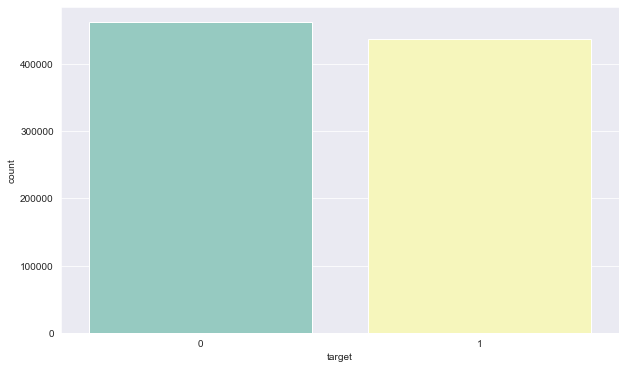

In [37]:
plt.figure(figsize = (10, 6))
sns.set_style('darkgrid')
sns.countplot(x='target',data= df_train, palette ='Set3')

### There're 16 float features

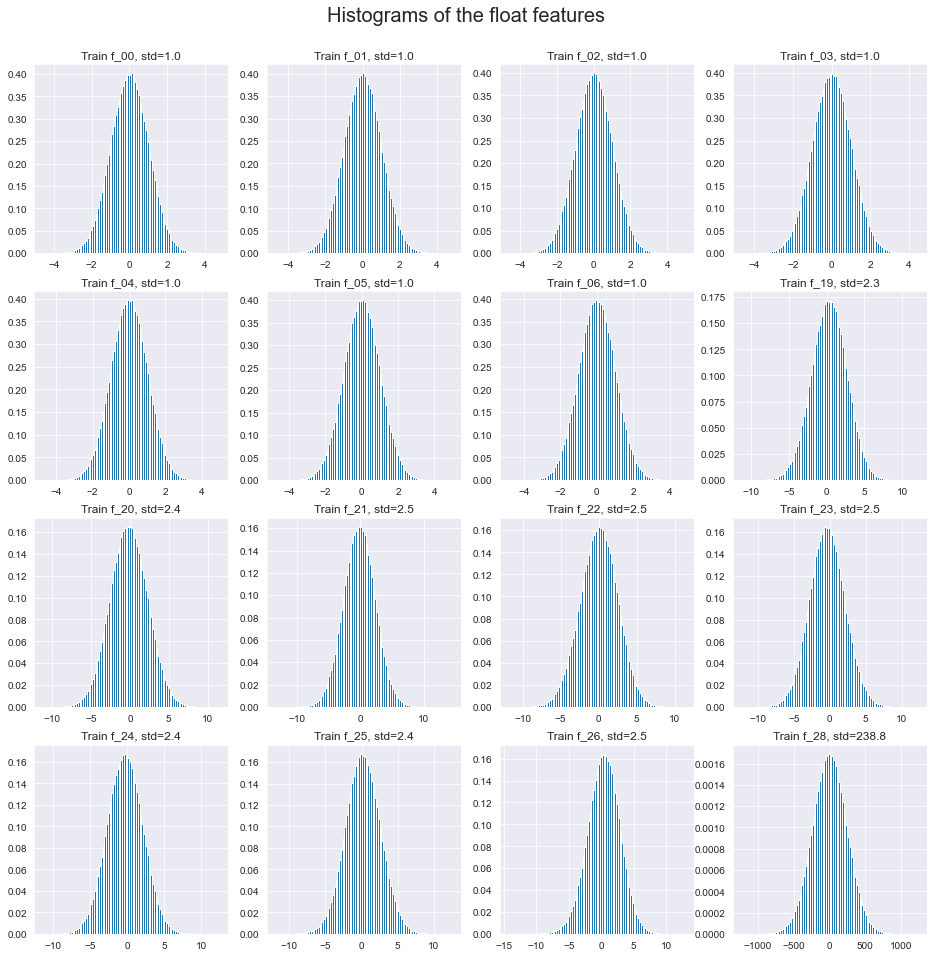

In [58]:
float_features = [f for f in df_train.columns if df_train[f].dtype == 'float64']

# Training histograms
fig, axs = plt.subplots(4, 4, figsize=(16, 16))
for f, ax in zip(float_features, axs.ravel()):
    ax.hist(df_train[f], density=True, bins=100)
    ax.set_title(f'Train {f}, std={df_train[f].std():.1f}')
plt.suptitle('Histograms of the float features', y=0.93, fontsize=20)
plt.show()

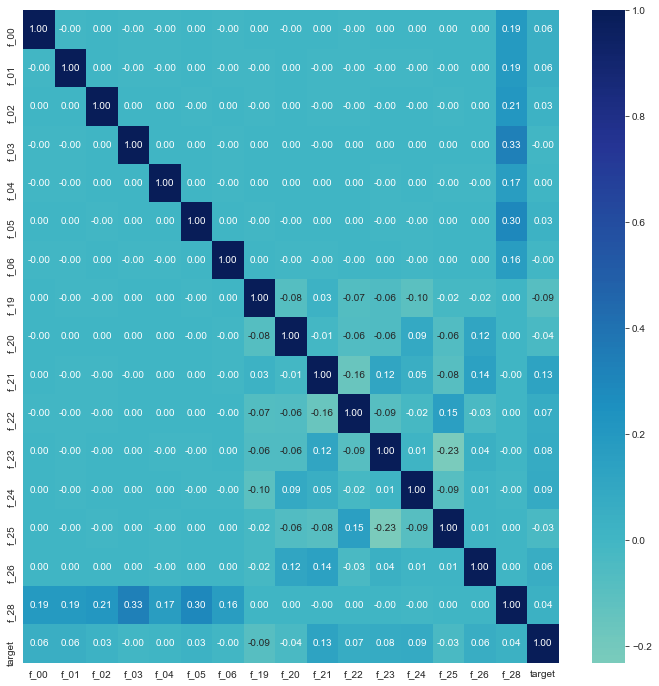

In [62]:
# Correlation matrix of the float features

plt.figure(figsize=(12, 12))
sns.heatmap(df_train[float_features + ['target']].corr(), center=0, annot=True, fmt='.2f', cmap='YlGnBu')
plt.show()

### Integer features

In [66]:
int_features = [i for i in df_train.columns if df_train[i].dtype == 'int64']

In [67]:
print(int_features)

['f_07', 'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_29', 'f_30', 'target']


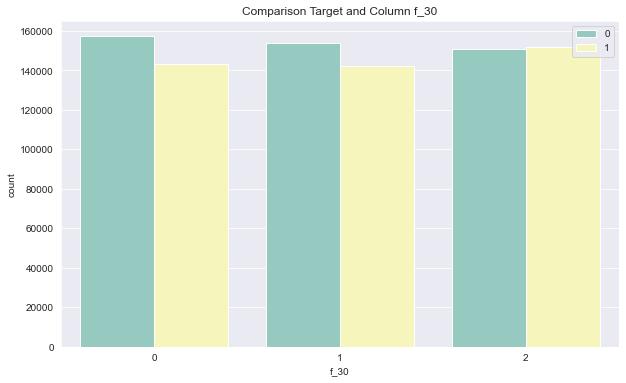

In [33]:
plt.figure(figsize = (10, 6))
sns.set_style('darkgrid')
sns.countplot(x='f_30', hue='target', palette ='Set3' ,data=df_train.sort_values(by=['f_30']))
plt.title('Comparison Target and Column f_30')
plt.legend(loc='upper right')


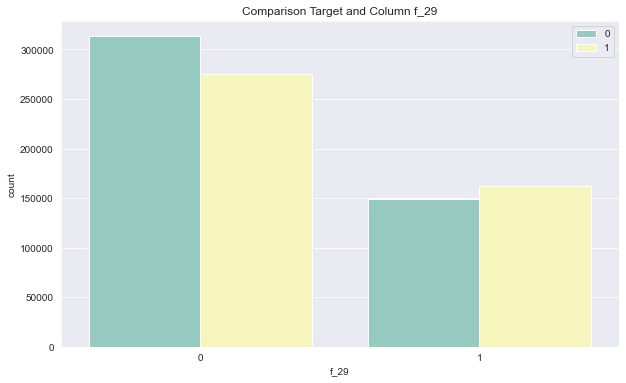

In [32]:
plt.figure(figsize = (10, 6))
sns.set_style('darkgrid')
sns.countplot(x='f_29', hue='target', palette ='Set3' ,data=df_train.sort_values(by=['f_29']))
plt.title('Comparison Target and Column f_29')
plt.legend(loc='upper right')


<AxesSubplot:title={'center':'Graph column 7'}, xlabel='f_07', ylabel='count'>

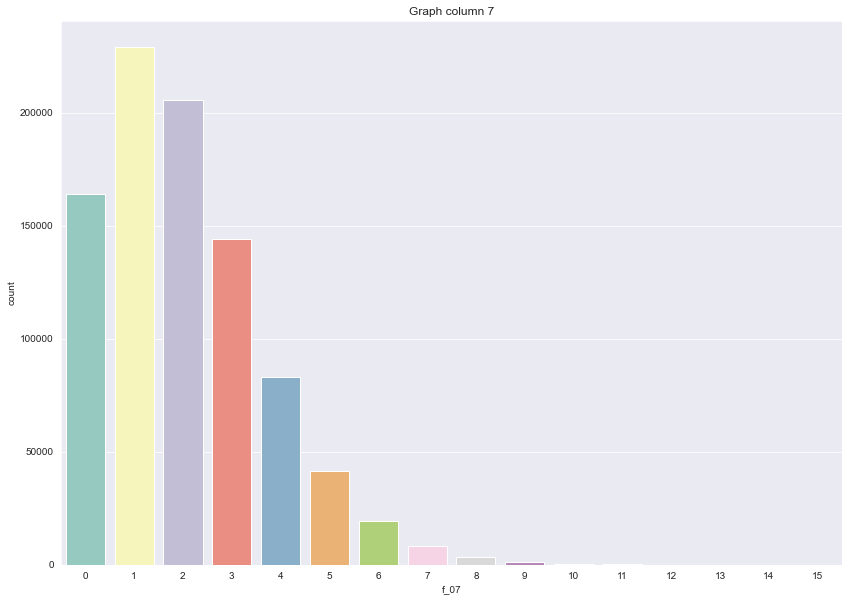

In [39]:
plt.figure(figsize = (14, 10))
sns.set_style('darkgrid')
plt.title('Graph column 7')
sns.countplot(x='f_07',data= df_train, palette ='Set3')

<AxesSubplot:title={'center':'Graph column 8'}, xlabel='f_08', ylabel='count'>

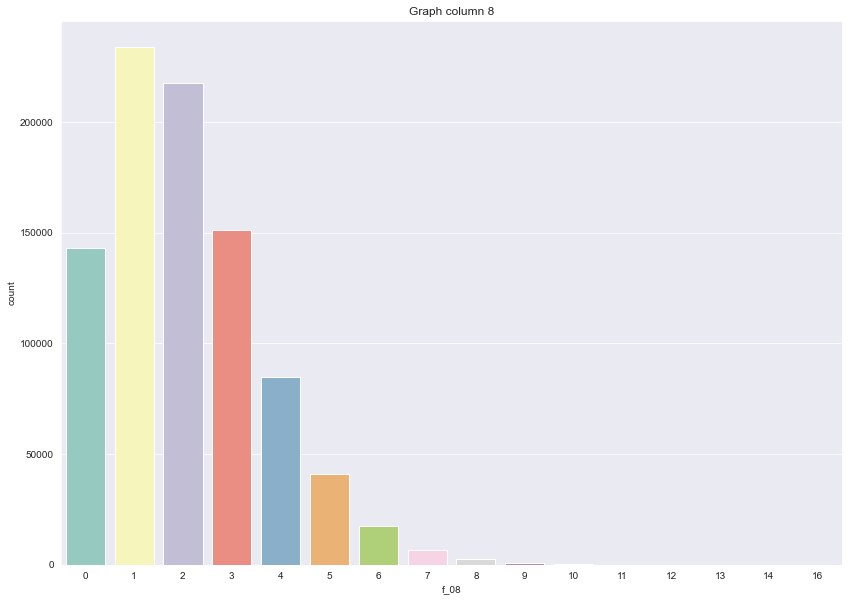

In [40]:
plt.figure(figsize = (14, 10))
sns.set_style('darkgrid')
plt.title('Graph column 8')
sns.countplot(x='f_08',data= df_train, palette ='Set3')

<AxesSubplot:title={'center':'Graph column 9'}, xlabel='f_09', ylabel='count'>

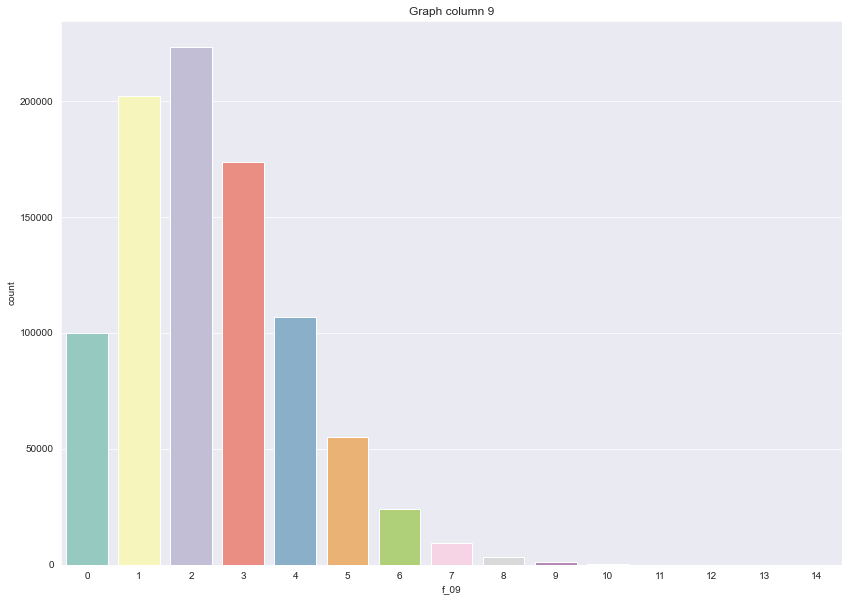

In [41]:
plt.figure(figsize = (14, 10))
sns.set_style('darkgrid')
plt.title('Graph column 9')
sns.countplot(x='f_09',data= df_train, palette ='Set3')

<AxesSubplot:title={'center':'Graph column 10'}, xlabel='f_10', ylabel='count'>

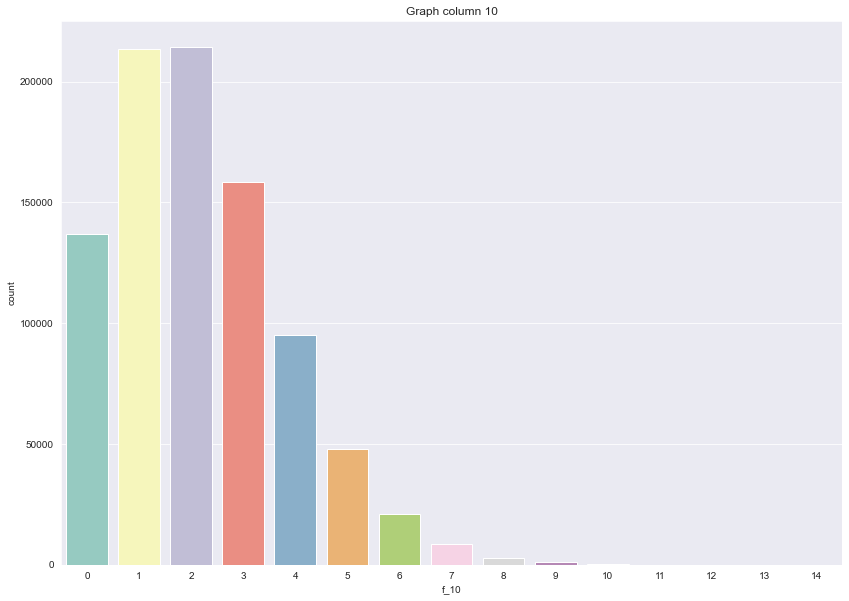

In [42]:
plt.figure(figsize = (14, 10))
sns.set_style('darkgrid')
plt.title('Graph column 10')
sns.countplot(x='f_10',data= df_train, palette ='Set3')

<AxesSubplot:title={'center':'Graph column 11'}, xlabel='f_11', ylabel='count'>

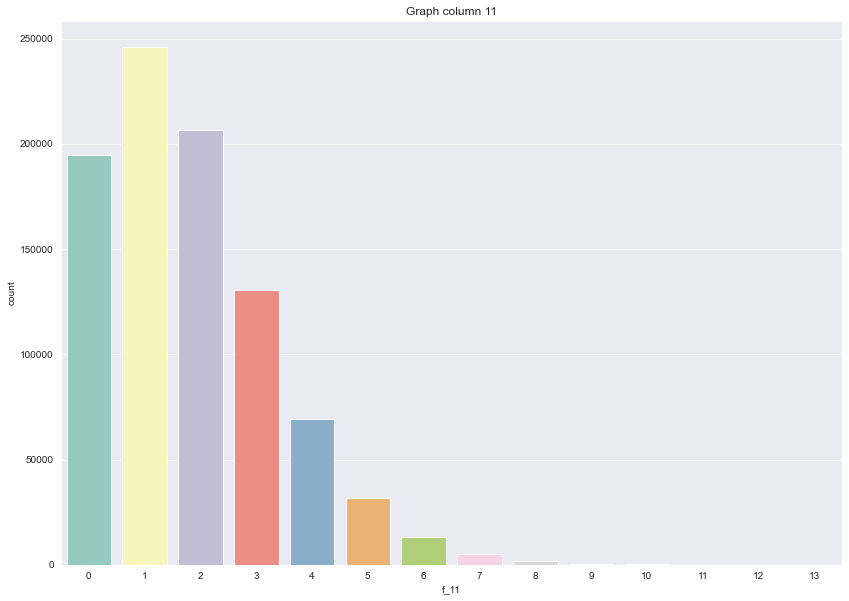

In [43]:
plt.figure(figsize = (14, 10))
sns.set_style('darkgrid')
plt.title('Graph column 11')
sns.countplot(x='f_11',data= df_train, palette ='Set3')

<AxesSubplot:title={'center':'Graph column 12'}, xlabel='f_12', ylabel='count'>

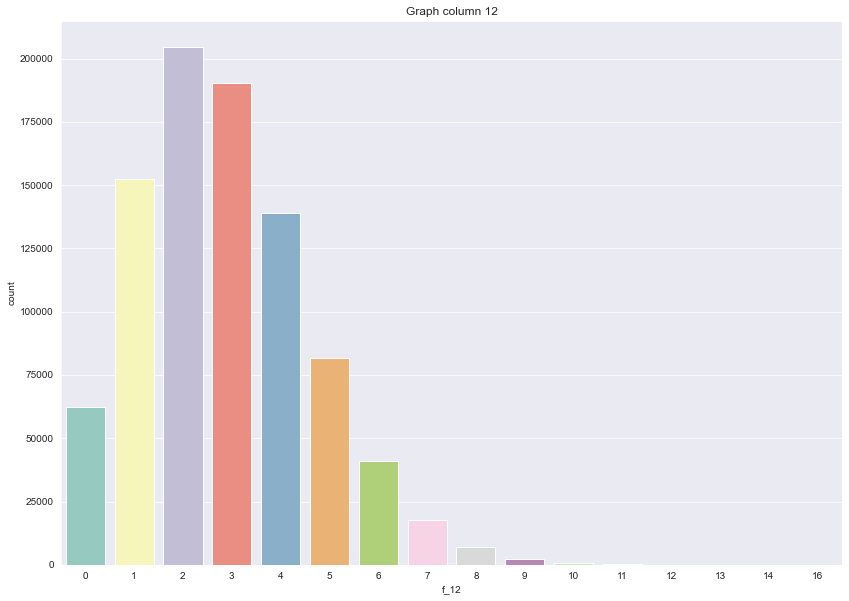

In [44]:
plt.figure(figsize = (14, 10))
sns.set_style('darkgrid')
plt.title('Graph column 12')
sns.countplot(x='f_12',data= df_train, palette ='Set3')

<AxesSubplot:title={'center':'Graph column 13'}, xlabel='f_13', ylabel='count'>

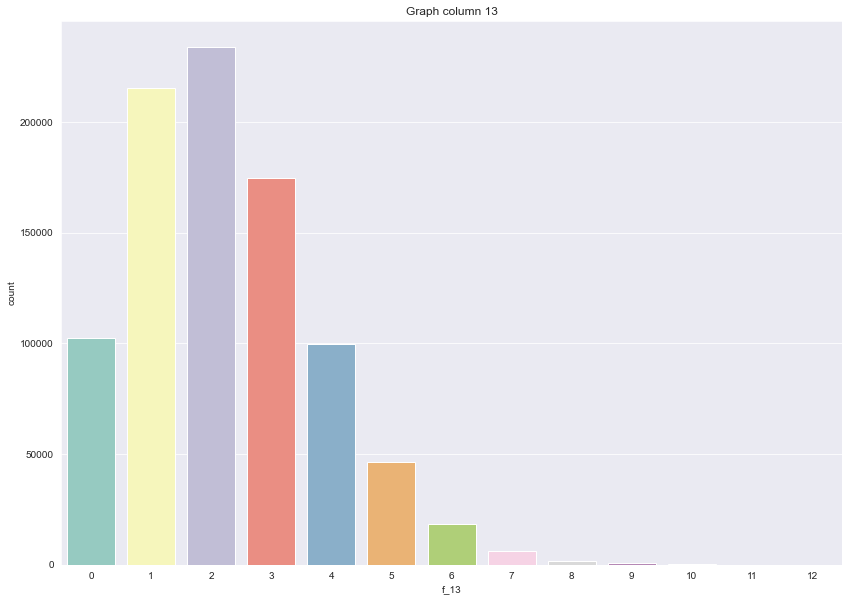

In [46]:
plt.figure(figsize = (14, 10))
sns.set_style('darkgrid')
plt.title('Graph column 13')
sns.countplot(x='f_13',data= df_train, palette ='Set3')

<AxesSubplot:title={'center':'Graph column 14'}, xlabel='f_14', ylabel='count'>

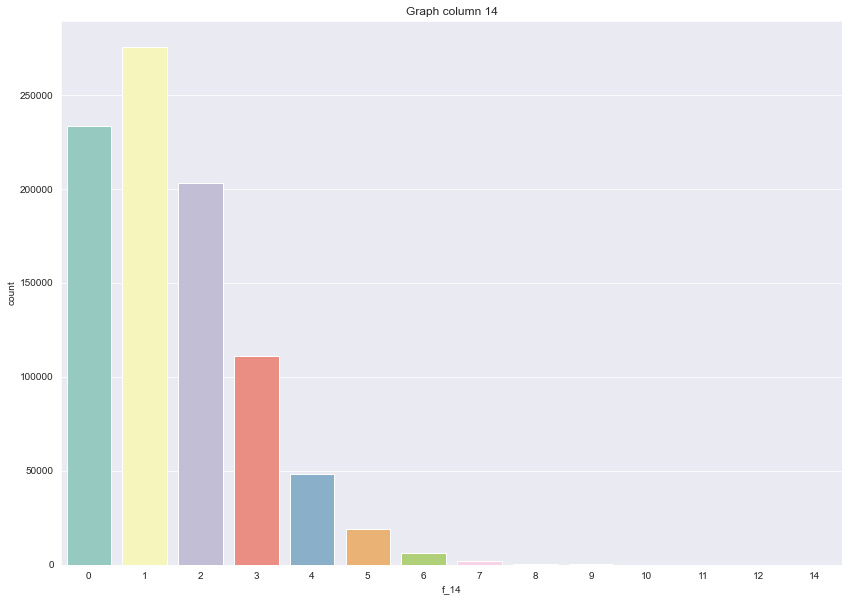

In [47]:
plt.figure(figsize = (14, 10))
sns.set_style('darkgrid')
plt.title('Graph column 14')
sns.countplot(x='f_14',data= df_train, palette ='Set3')

<AxesSubplot:title={'center':'Graph column 15'}, xlabel='f_15', ylabel='count'>

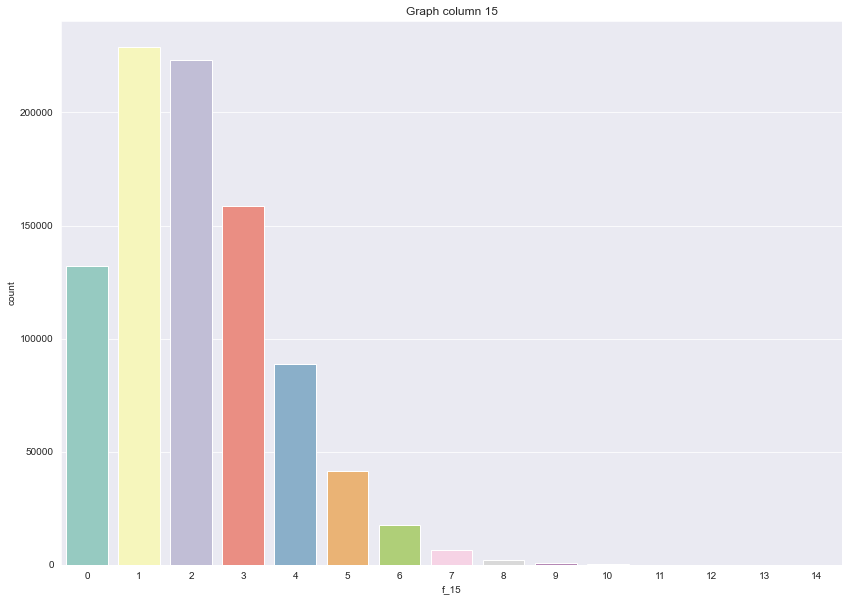

In [48]:
plt.figure(figsize = (14, 10))
sns.set_style('darkgrid')
plt.title('Graph column 15')
sns.countplot(x='f_15',data= df_train, palette ='Set3')

<AxesSubplot:title={'center':'Graph column 16'}, xlabel='f_16', ylabel='count'>

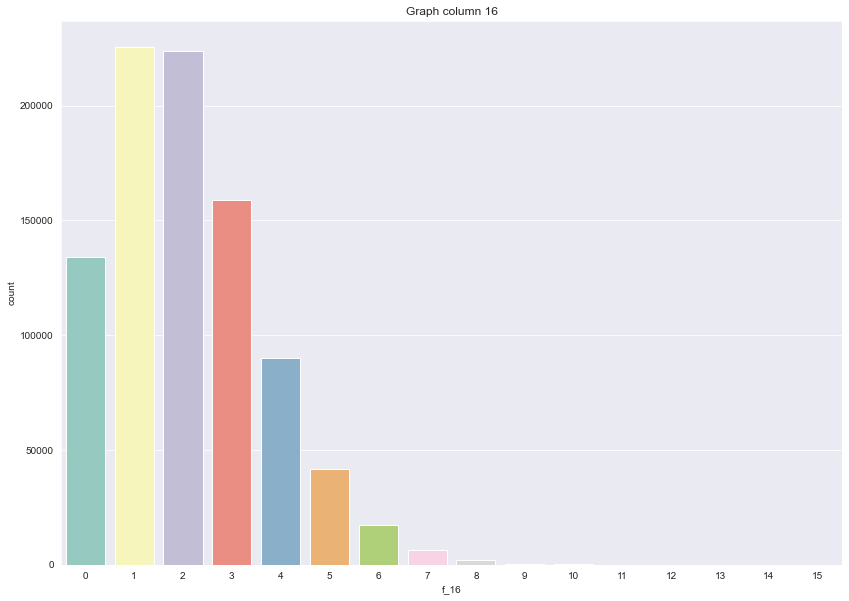

In [49]:
plt.figure(figsize = (14, 10))
sns.set_style('darkgrid')
plt.title('Graph column 16')
sns.countplot(x='f_16',data= df_train, palette ='Set3')

<AxesSubplot:title={'center':'Graph column 17'}, xlabel='f_17', ylabel='count'>

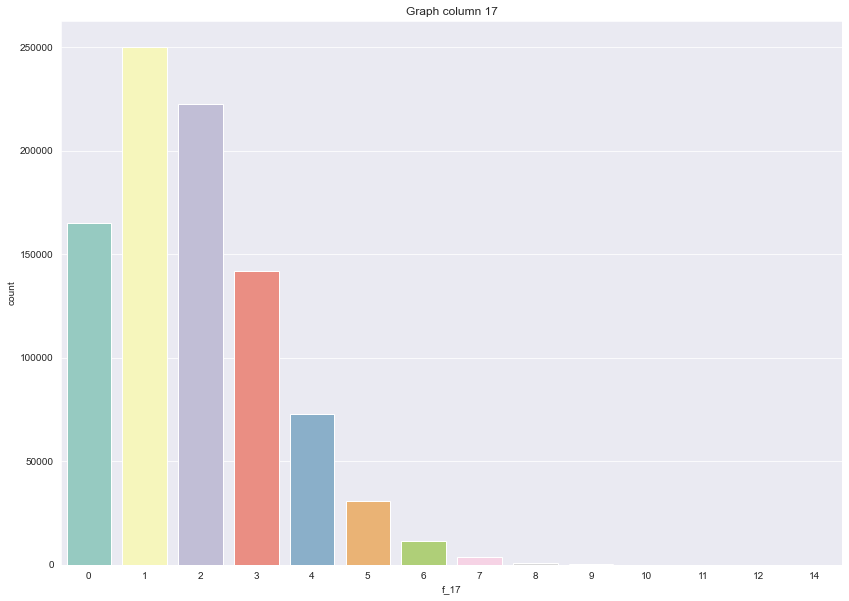

In [50]:
plt.figure(figsize = (14, 10))
sns.set_style('darkgrid')
plt.title('Graph column 17')
sns.countplot(x='f_17',data= df_train, palette ='Set3')

<AxesSubplot:title={'center':'Graph column 18'}, xlabel='f_18', ylabel='count'>

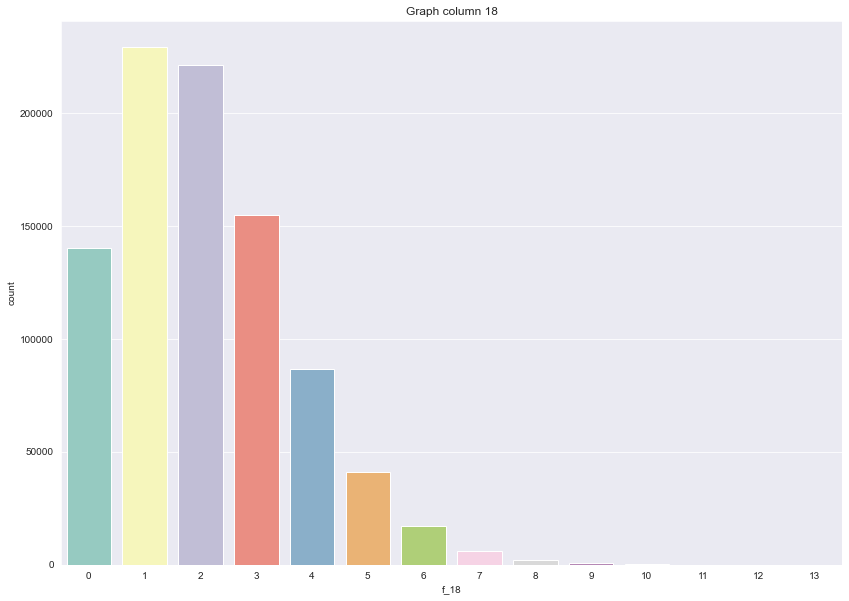

In [51]:
plt.figure(figsize = (14, 10))
sns.set_style('darkgrid')
plt.title('Graph column 18')
sns.countplot(x='f_18',data= df_train, palette ='Set3')

### Checking the feature 'f_27'

In [52]:
df_train['f_27'].head()

0    ABABDADBAB
1    ACACCADCEB
2    AAAEABCKAD
3    BDBBAACBCB
4    BDBCBBCHFE
Name: f_27, dtype: object

In [53]:
df_train['f_27'].value_counts()

BBBBBBCJBC    12
BCBBBBCLBC    12
BBBBBBDPCB    10
BBBBBBDKBC    10
ADBBBACQBC    10
              ..
BFAFAADTCE     1
BBBDAACOAE     1
BBABAACGBB     1
BFAABAGSDB     1
BCAACADSCE     1
Name: f_27, Length: 741354, dtype: int64

In [64]:
pd.concat([df_train, df_test]).f_27.value_counts()



BAAACABLBB    15
ACBBAABCBC    15
BAAACABNBC    15
BCBBBBCDCC    14
BBBBBBCJBC    13
              ..
ABBAAAECEB     1
ACBCBAEOAE     1
BBBCBBCACG     1
BBACDAANGA     1
AAAJCBGQBA     1
Name: f_27, Length: 1181880, dtype: int64

In [65]:
for i in range(10):
    print(f'Position {i}')
    tg = df_train.groupby(df_train.f_27.str.get(i))
    temp = pd.DataFrame({'size': tg.size(), 'probability': tg.target.mean().round(2)})
    print(temp)
    print()

Position 0
        size  probability
f_27                     
A     451207         0.54
B     448793         0.44

Position 1
        size  probability
f_27                     
A     144762         0.58
B     245160         0.48
C     225931         0.49
D     149579         0.45
E      78807         0.43
F      35487         0.42
G      13713         0.41
H       4647         0.40
I       1361         0.40
J        410         0.38
K        113         0.39
L         25         0.28
M          3         0.67
N          2         1.00

Position 2
        size  probability
f_27                     
A     297840         0.53
B     602160         0.46

Position 3
        size  probability
f_27                     
A     160839         0.57
B     237218         0.48
C     210015         0.48
D     143633         0.45
E      81662         0.43
F      39504         0.44
G      17121         0.45
H       6473         0.47
I       2379         0.48
J        772         0.51
K        254     